In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np

from promptopt import models
from promptopt import datasets
from promptopt import rlhf

from matplotlib import pyplot as plt
import matplotlib as mpl

In [3]:
n_embedding_dims = 2

In [4]:
net_arch_kwargs = {
  'n_layers': 0,
  'layer_size': None
}
pref_model = models.PrefModel(n_embedding_dims, net_arch_kwargs=net_arch_kwargs)

In [5]:
pref_model_train_config = rlhf.get_default_config()
pref_model_train_config.verbose = True

In [6]:
n_embeddings = 100
embeddings = np.random.normal(0, 1, (n_embeddings, n_embedding_dims))

In [7]:
embedding_dataset = datasets.EmbeddingDataset(embeddings=list(embeddings))

In [8]:
pref_dataset = datasets.PrefDataset(embedding_dataset)

In [9]:
R = np.sum(embeddings, axis=1)
for i in range(n_embeddings):
  for j in range(i+1, n_embeddings):
    pref = (R[i] > R[j]).astype(int)
    pref_dataset.append(i, j, pref)

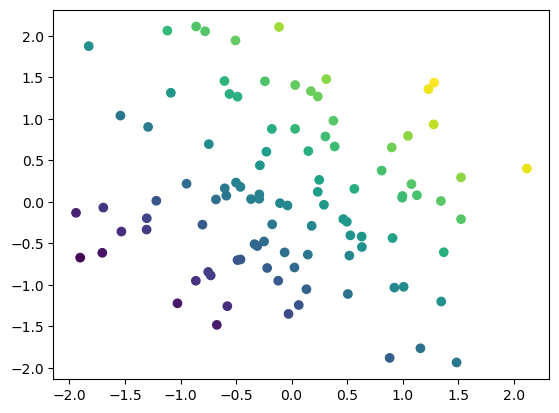

In [10]:
plt.scatter(embeddings[:, 0], embeddings[:, 1], c=R)
plt.show()

In [11]:
optimizer = rlhf.RLHF(pref_model, pref_model_train_config, embedding_dataset, pref_dataset)

epoch:  0, train_loss: 0.4177, val_loss: 0.3063
epoch:  1, train_loss: 0.2790, val_loss: 0.3055
epoch:  2, train_loss: 0.3361, val_loss: 0.2807
epoch:  3, train_loss: 0.2661, val_loss: 0.2558
epoch:  4, train_loss: 0.3259, val_loss: 0.2731
epoch:  5, train_loss: 0.2248, val_loss: 0.2269
epoch:  6, train_loss: 0.2403, val_loss: 0.2823
epoch:  7, train_loss: 0.1647, val_loss: 0.1682
epoch:  8, train_loss: 0.3037, val_loss: 0.2478
epoch:  9, train_loss: 0.2112, val_loss: 0.2407
epoch: 10, train_loss: 0.1854, val_loss: 0.1926
epoch: 11, train_loss: 0.1764, val_loss: 0.1732
epoch: 12, train_loss: 0.1818, val_loss: 0.1915
epoch: 13, train_loss: 0.1481, val_loss: 0.1578
epoch: 14, train_loss: 0.1480, val_loss: 0.1522
epoch: 15, train_loss: 0.1681, val_loss: 0.1130
epoch: 16, train_loss: 0.1611, val_loss: 0.1445
epoch: 17, train_loss: 0.2051, val_loss: 0.1406
epoch: 18, train_loss: 0.1981, val_loss: 0.1372
epoch: 19, train_loss: 0.1621, val_loss: 0.1048
epoch: 20, train_loss: 0.1675, val_loss:

In [13]:
embedding = optimizer.max_embedding(reg_const=1e2)

In [14]:
optimizer.predict_prefs(embedding)

DeviceArray([0.99999905, 0.9999943 , 0.99982643, 1.        , 1.        ,
             1.        , 1.        , 0.9999819 , 0.9999647 , 0.99999046,
             0.5674186 , 0.9999819 , 0.99994373, 0.9996596 , 0.99999046,
             1.        , 0.99988747, 0.9998131 , 0.99995995, 0.90988797,
             1.        , 0.9980602 , 1.        , 0.99324703, 0.99695766,
             0.9999838 , 0.99998856, 0.9998236 , 0.99999905, 1.        ,
             0.9999237 , 0.99998665, 1.        , 0.9995271 , 1.        ,
             0.99997044, 1.        , 0.9969586 , 0.98987687, 0.99999714,
             0.99692345, 0.9996777 , 0.99844956, 0.9824321 , 0.9999714 ,
             0.99999905, 1.        , 0.9998045 , 1.        , 1.        ,
             1.        , 0.9834107 , 0.99999905, 0.99999046, 0.9999275 ,
             0.9998474 , 0.8216602 , 0.99998474, 0.99999905, 0.99995613,
             1.        , 0.9989325 , 1.        , 0.95994043, 0.9536517 ,
             1.        , 1.        , 0.86792564, 1.